In [1]:
# Relationship bw mpg and other attributes
# Import necessary package

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier


#Decision Tree 
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('pima-indians-diabetes-2.csv')

In [3]:
df.head()
# problem statement- Identifying whether a person is diabetic or not
# hence it is a classification problem
# class is the target variable here.

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Here in df.isnull().sum() it shows there is no missing value. But we can see that there are zeros in 'test' and 'skin' columns.
# Hence Always be carefull with missing value in a DataSet.
# Beware of Zeros in 'class' column. BCZ there are not missing values. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.shape

(768, 9)

In [7]:
df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

<AxesSubplot:>

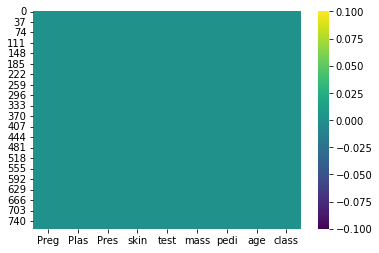

In [9]:
sns.heatmap(df.isnull(),cmap='viridis')

<AxesSubplot:>

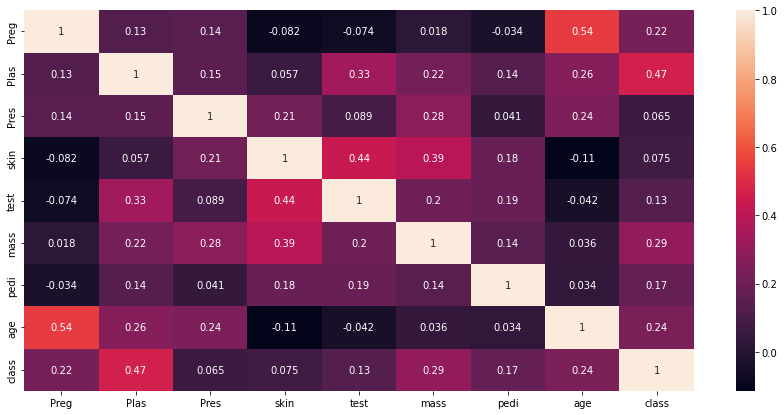

In [10]:
plt.figure(figsize = (15,7))
sns.heatmap(df.corr(),annot=True)


In [11]:
df.corr()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [ ]:
# in Correlation we can see that with target variable(class) we have very small relation of 'Pres' , 'Skin' , 'Test',.
# So here we have option to delete these columns.
# We also check whether there is multicollinearity problem or not.

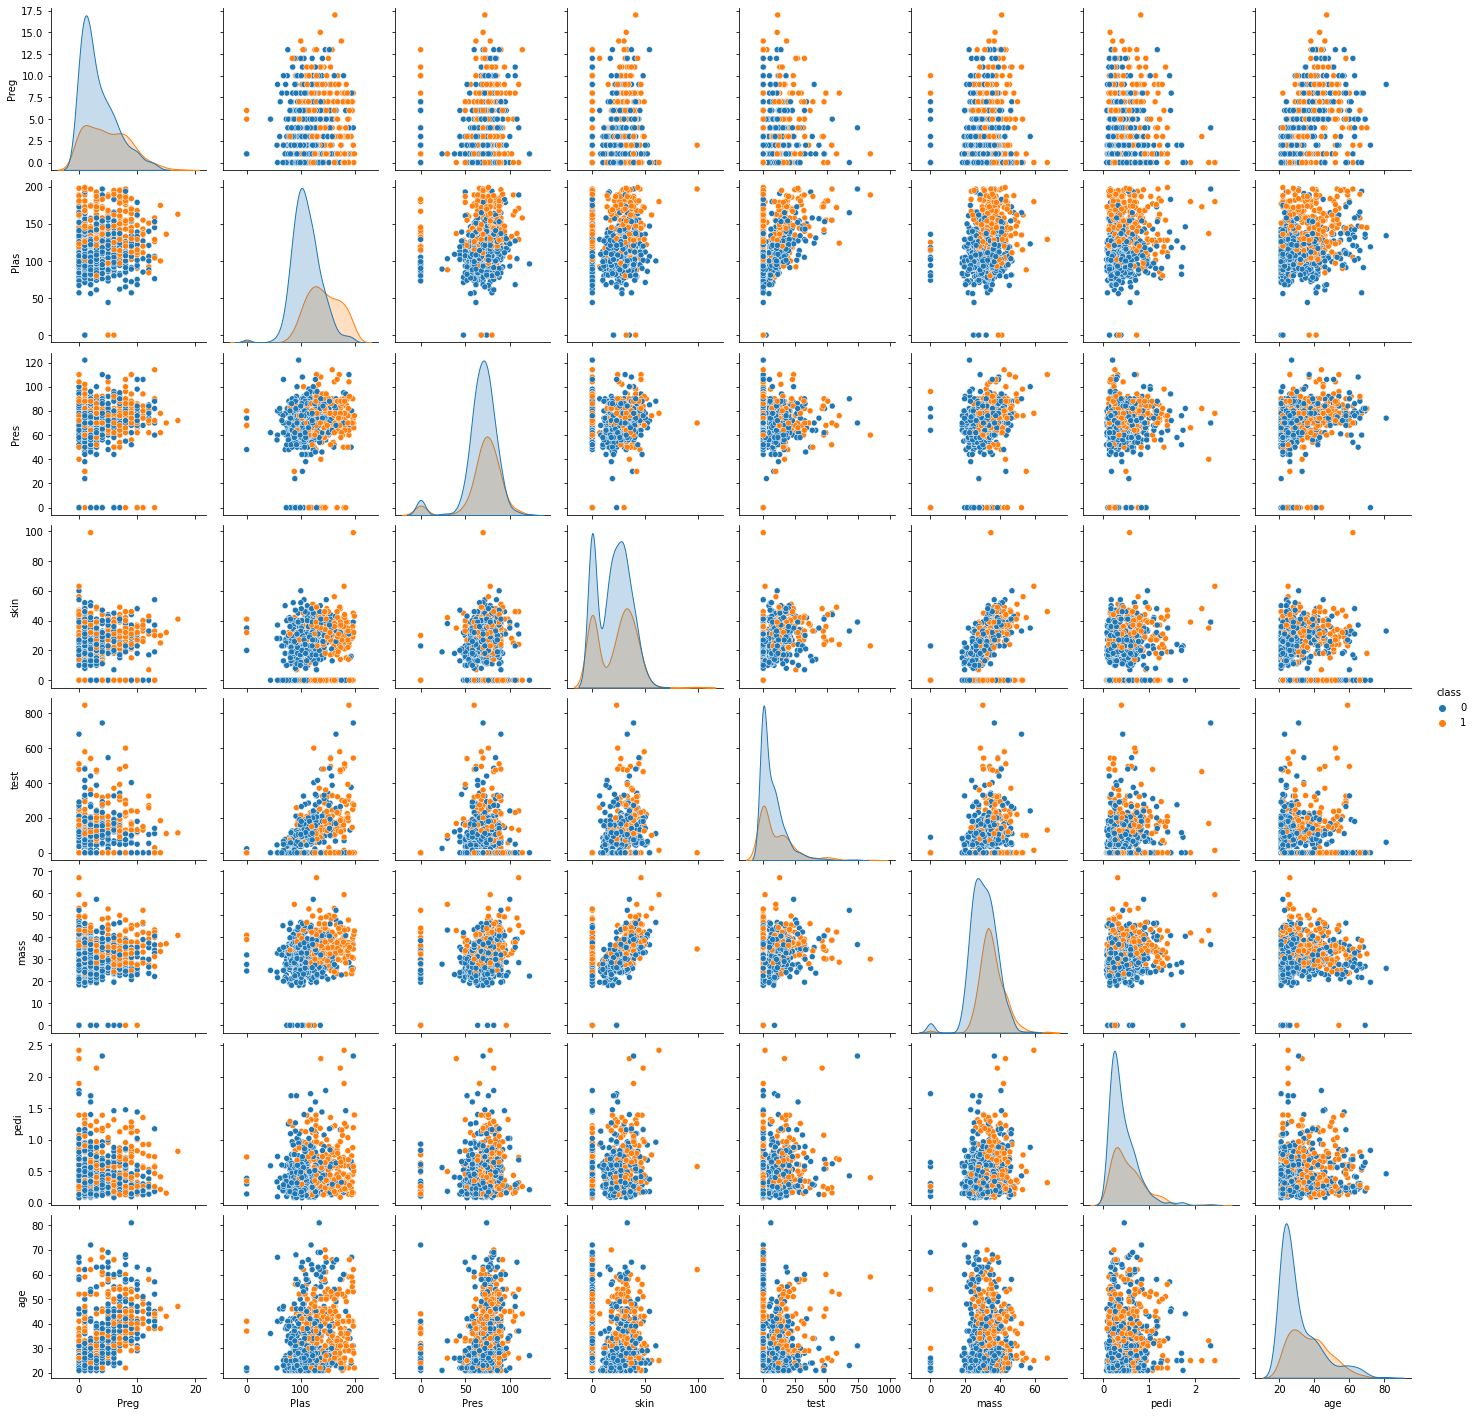

In [12]:
sns.pairplot(df,diag_kind='kde',hue='class')

In [13]:
# Here in pairplot orange represent class1 and blue represent class2
# We Always check whether it is balanced dataset or not.
# Balanced DataSet means for class 0 and 1 , there are appoximately equal number of data present in DataSet.
# Like - for class0, we have 1000 data. So We must have approx 1000 data point for class1.
# For balancing DataSet we have two method- 1.UpSampling  2.DownSampling
# In UpSampling we duplicate lessor data.
# In DownSampling we delete larger data.
# We mostly do the UpSampling.


In [14]:
df['class'].value_counts()
# This is the code for finding number of data for class0 and class1.


0    500
1    268
Name: class, dtype: int64

In [15]:
df.groupby(['class']).count()

,Preg,Plas,Pres,skin,test,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


In [ ]:
# In this data , Logistic Regression will not work very well. BCZ from pairplot we can see that all blue and orange data point 
# are overlapped. Since in Logistic Regg. our datapoint are well seperated.

In [16]:
x = df.drop('class',axis=1)
y= df['class']

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=1)

In [18]:
x_train.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
88,15,136,70,32,110,37.1,0.153,43
467,0,97,64,36,100,36.8,0.600,25
550,1,116,70,28,0,27.4,0.204,21
147,2,106,64,35,119,30.5,1.400,34
481,0,123,88,37,0,35.2,0.197,29


In [19]:
# DATA PREPERATION(Dealing With Missing Values)
# Since Zeros in 'class' column are not missing values. Hence We split the Data first.
# Now we deal zeroes in X_train.

In [20]:
# Now Replace 0 with 'mean' or 'median'.

In [21]:
from sklearn.impute import SimpleImputer
rep_0 = SimpleImputer(missing_values = 0,strategy='mean')
cols = x_train.columns
x_train = pd.DataFrame(rep_0.fit_transform(x_train))
x_test = pd.DataFrame(rep_0.fit_transform(x_test))

x_train.columns=cols
x_test.columns=cols

x_train.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,15.000000,136.0,70.0,32.0,110.000000,37.1,0.153,43.0
1,4.396514,97.0,64.0,36.0,100.000000,36.8,0.600,25.0
2,1.000000,116.0,70.0,28.0,158.243346,27.4,0.204,21.0
3,2.000000,106.0,64.0,35.0,119.000000,30.5,1.400,34.0
4,4.396514,123.0,88.0,37.0,158.243346,35.2,0.197,29.0


In [ ]:
# Logistic Regression 

In [22]:
lr_model = LogisticRegression(solver='newton-cg')
lr_model.fit(x_train,y_train)

LogisticRegression(solver='newton-cg')

In [23]:
predictions=lr_model.predict(x_test)

In [24]:
model_score = lr_model.score(x_train,y_train)
model_score

0.770949720670391

In [25]:
model_score = lr_model.score(x_test,y_test)
model_score

0.7878787878787878

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7878787878787878

In [27]:
from sklearn import metrics
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.77      0.60      0.68        85

    accuracy                           0.79       231
   macro avg       0.78      0.75      0.76       231
weighted avg       0.79      0.79      0.78       231



<AxesSubplot:>

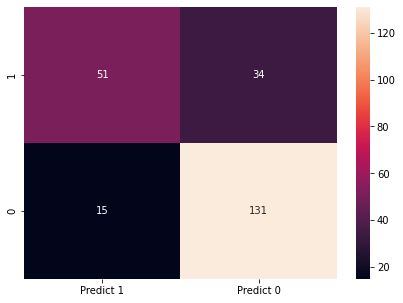

In [28]:
cm = metrics.confusion_matrix(y_test,predictions,labels=[1,0])
df_cm = pd.DataFrame(cm,index=[i for i in ['1','0']],columns=[i for i in ['Predict 1','Predict 0']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [ ]:
# KNN Model(K Nearest Neighbours) for classifictaion problems

In [29]:
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
# Whenever we use any Algorithm i.e. related to  distance. We alwas use "zscore".

In [31]:
Xscaled = x.apply(zscore)
# Zscore = (x-mue)/sigma  
# difference of each data point with mean and then we divide it by standard deviation.

In [32]:
Xscaled.head()
# all the value are scaled down.

,Preg,Plas,Pres,skin,test,mass,pedi,age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [33]:
Xscaled.transpose()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
Preg,0.639947,-0.844885,1.233880,-0.844885,-1.141852,0.342981,-0.250952,1.827813,-0.547919,1.233880,...,-0.844885,0.639947,-0.547919,1.530847,1.530847,1.827813,-0.547919,0.342981,-0.844885,-0.844885
Plas,0.848324,-1.123396,1.943724,-0.998208,0.504055,-0.153185,-1.342476,-0.184482,2.381884,0.128489,...,-0.466156,2.162804,-1.029505,1.536861,-0.998208,-0.622642,0.034598,0.003301,0.159787,-0.873019
Pres,0.149641,-0.160546,-0.263941,-0.160546,-1.504687,0.253036,-0.987710,-3.572597,0.046245,1.390387,...,0.356432,1.183596,-0.574128,0.253036,-0.367337,0.356432,0.046245,0.149641,-0.470732,0.046245
skin,0.907270,0.530902,-1.288212,0.154533,0.907270,-1.288212,0.719086,-1.288212,1.534551,-1.288212,...,-1.288212,-1.288212,0.342717,0.656358,-1.288212,1.722735,0.405445,0.154533,-1.288212,0.656358
test,-0.692891,-0.692891,-0.692891,0.123302,0.765836,-0.692891,0.071204,-0.692891,4.021922,-0.692891,...,-0.692891,-0.692891,-0.553964,-0.692891,-0.692891,0.870031,-0.692891,0.279594,-0.692891,-0.692891
mass,0.204013,-0.684422,-1.103255,-0.494043,1.409746,-0.811341,-0.125977,0.419775,-0.189437,-4.060474,...,0.698998,0.445159,-0.455967,1.523973,-1.204791,0.115169,0.610154,-0.735190,-0.240205,-0.202129
pedi,0.468492,-0.365061,0.604397,-0.920763,5.484909,-0.818079,-0.676133,-1.020427,-0.947944,-0.724455,...,-0.830159,-0.585529,0.888288,-0.208015,-0.996266,-0.908682,-0.398282,-0.685193,-0.371101,-0.473785
age,1.425995,-0.190672,-0.105584,-1.041549,-0.020496,-0.275760,-0.616111,-0.360847,1.681259,1.766346,...,-0.616111,2.787399,-0.956462,0.830381,-0.020496,2.532136,-0.531023,-0.275760,1.170732,-0.871374


In [34]:
x_train,x_test,y_train,y_test=train_test_split(Xscaled,y,test_size=.3,random_state=40)

In [35]:
x_train.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age
402,0.342981,0.472758,0.770014,1.283638,0.071204,0.381700,-0.561368,0.149679
748,-0.250952,2.068912,0.046245,0.091805,1.043689,0.559387,-0.192914,0.234767
606,-0.844885,1.881130,0.459827,1.346366,1.851198,1.016296,2.374187,-0.956462
253,-1.141852,-1.092099,-0.057150,0.719086,-0.692891,0.483235,-0.706334,-0.701198
361,0.342981,1.161295,0.046245,-1.288212,-0.692891,-0.278280,-0.799958,2.532136


In [36]:
NNH = KNeighborsClassifier(n_neighbors = 5,metric='euclidean')

In [37]:
NNH.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [38]:
predicted_labels= NNH.predict(x_test)
NNH.score(x_train,y_train)


0.8342644320297952

In [39]:
NNH.score(x_test,y_test)

0.7316017316017316

In [40]:
from sklearn import metrics

In [42]:
metrics.accuracy_score(y_test,predicted_labels)

0.7316017316017316

<AxesSubplot:>

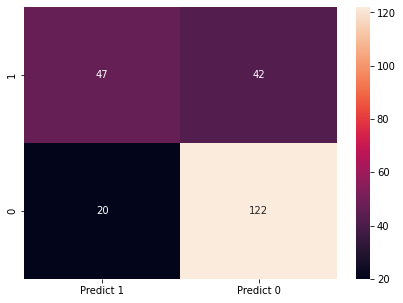

In [41]:
cm = metrics.confusion_matrix(y_test,predicted_labels,labels=[1,0])
df_cm = pd.DataFrame(cm,index=[i for i in ['1','0']],columns=[i for i in ['Predict 1','Predict 0']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [43]:
NNH = KNeighborsClassifier(n_neighbors = 5,metric='manhattan')

In [44]:
NNH.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan')

In [45]:
predicted_labels= NNH.predict(x_test)

NNH.score(x_test,y_test)

0.70995670995671

In [46]:
NNH.score(x_train,y_train)

0.8212290502793296

<AxesSubplot:>

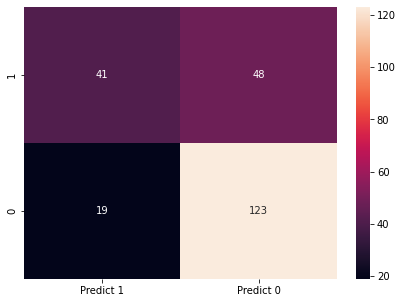

In [47]:
cm = metrics.confusion_matrix(y_test,predicted_labels,labels=[1,0])
df_cm = pd.DataFrame(cm,index=[i for i in ['1','0']],columns=[i for i in ['Predict 1','Predict 0']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [ ]:
# SVM Model

In [48]:
from sklearn import svm

In [49]:
clf =svm.SVC(gamma = .005 ,C = 3,kernel='poly')

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=40)

In [51]:
clf.fit(x_train,y_train)

In [ ]:
y_pred = clf.predict(x_test)
# We are finding this bcz we use this in confusion matrix.

In [34]:
print(clf.score(x_train,y_train))
print(clf.score(x_test,y_test))

0.6666666666666666
0.6147186147186147


<AxesSubplot:>

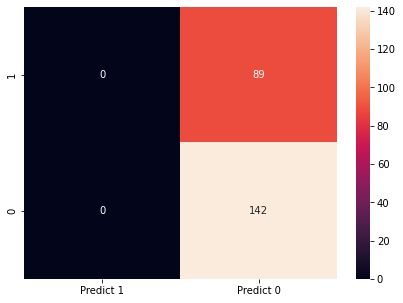

In [35]:
cm = metrics.confusion_matrix(y_test,y_pred,labels=[1,0])
df_cm = pd.DataFrame(cm,index=[i for i in ['1','0']],columns=[i for i in ['Predict 1','Predict 0']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [7]:
# Decision Tree

In [8]:
dTree = DecisionTreeClassifier(criterion='gini',random_state=1,max_depth = 5)
dTree.fit(x_train,y_train)

#The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. 
#The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source).


DecisionTreeClassifier(max_depth=5, random_state=1)

In [9]:
print(dTree.score(x_train,y_train))
print(dTree.score(x_test,y_test))

0.8361266294227188
0.7878787878787878


In [26]:
dTree = DecisionTreeClassifier(criterion="entropy",random_state=1,max_depth = 5)
dTree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)

In [27]:
print(dTree.score(x_train,y_train))
print(dTree.score(x_test,y_test))

0.8305400372439479
0.8051948051948052


In [ ]:
# for Pima 'entropy' gives better results.

In [ ]:
# Bagging

In [12]:
from sklearn.ensemble import BaggingClassifier

In [28]:
bgcl = BaggingClassifier(n_estimators=50,base_estimator=dTree,random_state=1)
bgcl = bgcl.fit(x_train,y_train)
# n_estimators means how many decision tree i m going to grow.
# dTree this is specified in above decision tree. It take that model and make trees in Bagging.
# In dTree we specified max_deapth = 3.Hence all trees in Bagging will grow upto 3.

In [29]:
print(bgcl.score(x_train,y_train))
print(bgcl.score(x_test,y_test))

0.8528864059590316
0.7878787878787878


In [30]:
bgcl = BaggingClassifier(n_estimators=120,base_estimator=dTree,random_state=1)
bgcl = bgcl.fit(x_train,y_train)
# n_estimators means how many decision tree i m going to grow.
# dTree this is specified in above decision tree. It take that model and make trees in Bagging.
# In dTree we specified max_deapth = 3.Hence all trees in Bagging will grow upto 3.

In [31]:
print(bgcl.score(x_train,y_train))
print(bgcl.score(x_test,y_test))

0.8528864059590316
0.7965367965367965


In [ ]:
# Boosting Techniques

In [38]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=20, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(x_train, y_train)

0.7662337662337663
0.8044692737430168


<AxesSubplot:>

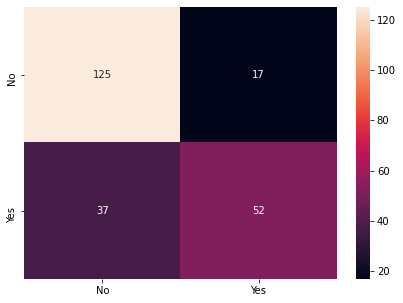

In [39]:
y_predict = abcl.predict(x_test)
print(abcl.score(x_test , y_test))
print(abcl.score(x_train , y_train))

from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


In [32]:
from sklearn.ensemble import GradientBoostingClassifier
abcl =GradientBoostingClassifier(n_estimators=7, random_state=1)
abcl = abcl.fit(x_train, y_train)

0.7532467532467533
0.7783985102420856


<AxesSubplot:>

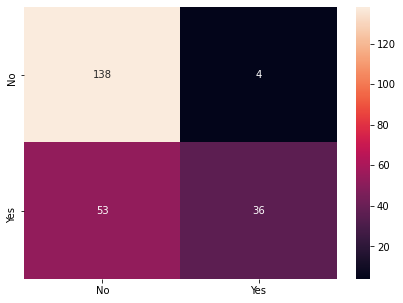

In [33]:
y_predict = abcl.predict(x_test)
print(abcl.score(x_test , y_test))
print(abcl.score(x_train , y_train))

from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


In [32]:
# Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 60, random_state=1,max_features=3)
rfcl = rfcl.fit(x_train, y_train)

1.0
0.8008658008658008


<AxesSubplot:>

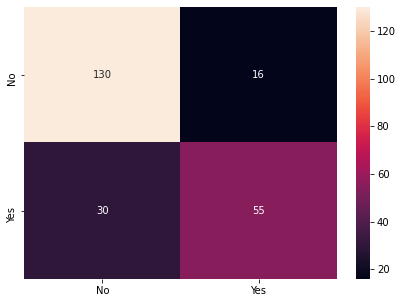

In [42]:
y_predict = rfcl.predict(x_test)
print(rfcl.score(x_train, y_train))
print(rfcl.score(x_test, y_test))

from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')
